## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm


## Gaussian and CLT Recap

### Purchase time


The average time taken for customers to complete a purchase is 4 minutes with a standard deviation of 1 minute. Find the probability that a randomly selected customer will complete a purchase within 6 minutes? Assume Gaussian

In [2]:
norm.cdf(x=6,loc=4,scale=1)

0.9772498680518208

What is the probability that the average time of the next 5 customers is less than 6 minutes?

In [5]:
norm.cdf(x=6,loc=4,scale=(1/np.sqrt(5)))

0.9999961278917845

### Purchase amount

The average order value on an e-commerce website is 50, with a standard deviation of 5. What is the probability that a randomly selected order will have a value exceeding 60?

In [3]:
1-norm.cdf(x=60,loc=50,scale=5)

0.02275013194817921

What is the probability that the average of the next 3 orders exceeds $60?

In [8]:
1-norm.cdf(x=60,loc=50,scale=(5/np.sqrt(3)))

0.00026600275256960515

### Body temperature

Average body temperature has a mean of 98.6°F and a standard deviation of 0.5°F. What is the probability that a randomly chosen patient has a body temperature higher than 99.5°F?

In [4]:
1-norm.cdf(x=99.5,loc=98.6,scale=0.5)

0.03593031911292488

## Confidence Interval using CLT

### Height example

The mean height of a sample of 100 adults was found to be 65 inches, with a standard deviation of 2.5 inches.

In [9]:
std_error=2.5/np.sqrt(100)
std_error

0.25

In [10]:
z1=norm.ppf(0.025)
z1

-1.9599639845400545

In [11]:
z2=norm.ppf(0.975)
z2

1.959963984540054

In [14]:
x1= 65 + (z1* std_error)
x1

64.51000900386498

In [15]:
x2= 65 + (z2* std_error)
x2

65.48999099613502

With 95 % confidence --> [64.5,65.4]

In [16]:
norm.interval(0.95,loc=65,scale=std_error)

(64.51000900386498, 65.48999099613502)

### Recovery days

The sample mean recovery time of 100 patients after taking a drug was seen to be 10.5 days with a standard deviation of 2 days. Find the 95% confidence interval of the true mean.

In [17]:
norm.interval(0.95,loc=10.5,scale=(2/np.sqrt(100)))

(10.10800720309199, 10.89199279690801)

In [18]:
std_error=2/np.sqrt(100)
std_error

0.2

In [19]:
z1=norm.ppf(0.025)
z1

-1.9599639845400545

In [20]:
z2=norm.ppf(0.975)
z2

1.959963984540054

In [21]:
x1= 10.5 + (z1* std_error)
x1

10.108007203091988

In [22]:
x2= 10.5 + (z2* std_error)
x2

10.89199279690801

In [23]:
norm.interval(0.95,loc=10.5,scale=(2/np.sqrt(100)))

(10.10800720309199, 10.89199279690801)

### Youtube watch hours

The mean Youtube watch time of a sample of 100 students was found to be 3.5 hours, with a standard deviation of 1 hour. Construct a 90% confidence interval for the true watch time.

In [24]:
norm.interval(0.90,loc=3.5,scale=(1/np.sqrt(100)))

(3.3355146373048528, 3.6644853626951472)

In [25]:
std_error=1/np.sqrt(100)
std_error

0.1

In [26]:
z1=norm.ppf(0.05)
z1

-1.6448536269514729

In [27]:
z2=norm.ppf(0.95)
z2

1.6448536269514722

In [28]:
x1= 3.5 + (z1* std_error)
x1

3.3355146373048528

In [29]:
x2= 3.5 + (z2* std_error)
x2

3.6644853626951472

In [30]:
norm.interval(0.90,loc=3.5,scale=(1/np.sqrt(100)))

(3.3355146373048528, 3.6644853626951472)

## Confidence Interval using Bootstrap

In [31]:
survey_1 = [35, 36, 33, 37, 34, 35]
np.mean(survey_1)

35.0

In [32]:
survey_2 = [20, 37, 17, 50, 53, 33]
np.mean(survey_2)

35.0

In [77]:
bootstrapped_sample=np.random.choice(survey_1,size=6)
np.mean(bootstrapped_sample)

34.666666666666664

In [86]:
bootstrapped_sample=np.random.choice(survey_2,size=6)
np.mean(bootstrapped_sample)

32.833333333333336

In [87]:
bootstrapped_sample_mean=[]
for i in range(10000):
    bootstrapped_sample=np.random.choice(survey_1,size=6)
    bootstrapped_mean=np.mean(bootstrapped_sample)
    bootstrapped_sample_mean.append(bootstrapped_mean)
    

<AxesSubplot:ylabel='Count'>

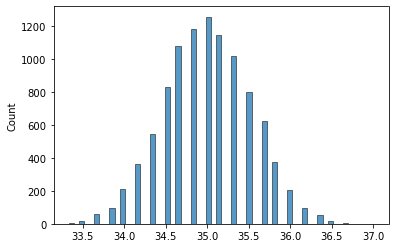

In [88]:
sns.histplot(bootstrapped_sample_mean)

<AxesSubplot:ylabel='Count'>

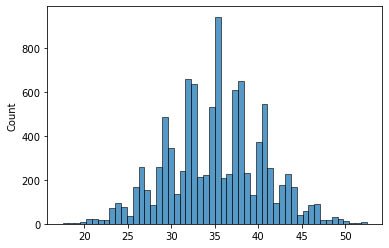

In [90]:
bootstrapped_sample_mean2=[]
for i in range(10000):
    bootstrapped_sample2=np.random.choice(survey_2,size=6)
    bootstrapped_mean2=np.mean(bootstrapped_sample2)
    bootstrapped_sample_mean2.append(bootstrapped_mean2)
sns.histplot(bootstrapped_sample_mean2)

In [91]:
len(bootstrapped_sample_mean)

10000

In [92]:
np.percentile(bootstrapped_sample_mean,2.5)

34.0

In [93]:
np.percentile(bootstrapped_sample_mean,97.5)

36.0

Confidence Interval : [34.0, 36.0]

In [94]:
len(bootstrapped_sample_mean2)

10000

In [95]:
np.percentile(bootstrapped_sample_mean2,2.5)

24.162500000000005

In [96]:
np.percentile(bootstrapped_sample_mean2,97.5)

46.0

Confidence Interval : [24.16, 46.0]

In [97]:
!ls 

09_Confidence_Interval_Notebook.ipynb sehwag.csv


In [98]:
df=pd.read_csv("sehwag.csv")
df

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,15,21,15,2,0,100.00,2,caught,1,NaN,v Sri Lanka,Hambantota,24 Jul 2012,ODI # 3292
241,3,6,6,0,0,50.00,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),28 Jul 2012,ODI # 3293
242,34,46,29,6,0,117.24,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),31 Jul 2012,ODI # 3294
243,4,20,11,1,0,36.36,2,bowled,1,NaN,v Pakistan,Chennai,30 Dec 2012,ODI # 3314


In [101]:
sample_size=6

In [139]:
df["Runs"].shape

(245,)

In [138]:
df["Runs"].sample(sample_size).mean()

45.666666666666664

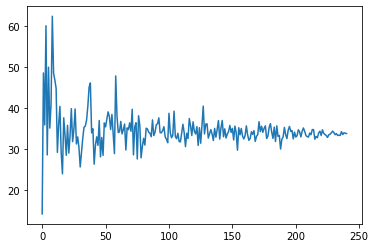

In [144]:
sample_size_trend=[]
for i in range(5,246):
    sample_mean= df["Runs"].sample(i).mean()
    sample_size_trend.append(sample_mean)
plt.plot(sample_size_trend)

Text(0, 0.5, 'sample_mean')

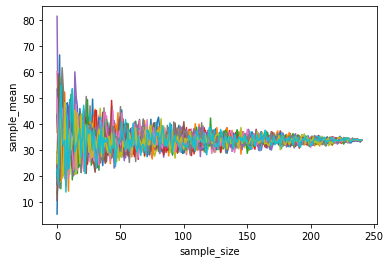

In [146]:
sample_size_trend=[]
for j in range(20):
    for i in range(5,246):
        sample_mean= df["Runs"].sample(i).mean()
        sample_size_trend.append(sample_mean)
    plt.plot(sample_size_trend)
    sample_size_trend=[]
plt.xlabel("sample_size")
plt.ylabel("sample_mean")